# Модели машинного обучения. Оценка качества

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='whitegrid')

In [2]:
tfidf_df = pd.read_csv("data/metrics/tfidf.csv")
tfidf_df_extra = pd.read_csv("data/metrics/tfidf_extra.csv", header=None)
tfidf_df_extra.columns = tfidf_df.columns.values
ft_df = pd.read_csv("data/metrics/fasttext.csv", header=None)
ft_df.columns = tfidf_df.columns.values
ft_df_extra = pd.read_csv("data/metrics/fasttext_extra.csv", header=None)
ft_df_extra.columns = tfidf_df.columns.values

In [3]:
metrics = pd.concat([tfidf_df, ft_df, tfidf_df_extra, ft_df_extra], ignore_index=True)
metrics

,model,accuracy,f1_avg,f1_bug,f1_enh,f1_doc,f1_que,extra_processed
0,TF-IDF + KNN,0.480687,0.480687,0.444802,0.423343,0.550073,0.473636,False
1,TF-IDF + Логистическая регрессия,0.723375,0.723375,0.733629,0.710398,0.757551,0.693811,False
2,TF-IDF + Машина опорных векторов,0.723375,0.723375,0.733629,0.710398,0.757551,0.693811,False
3,TF-IDF + Наивный байесовский классификатор,0.667750,0.667750,0.687538,0.643487,0.706767,0.638435,False
4,TF-IDF + Дерево решений,0.502250,0.502250,0.581963,0.510887,0.507740,0.370066,False
5,TF-IDF + Случайный лес,0.554500,0.554500,0.606736,0.530650,0.570174,0.503800,False
6,fasttext,0.732688,0.732687,0.731522,0.727784,0.771141,0.702101,False
7,TF-IDF + KNN,0.457437,0.457437,0.450352,0.425988,0.540917,0.355485,True
8,TF-IDF + Логистическая регрессия,0.705125,0.705125,0.715294,0.691648,0.751728,0.664150,True
9,TF-IDF + Машина опорных векторов,0.705125,0.705125,0.715294,0.691648,0.751728,0.664150,True


In [4]:
metrics[metrics.extra_processed == False]

,model,accuracy,f1_avg,f1_bug,f1_enh,f1_doc,f1_que,extra_processed
0,TF-IDF + KNN,0.480687,0.480687,0.444802,0.423343,0.550073,0.473636,False
1,TF-IDF + Логистическая регрессия,0.723375,0.723375,0.733629,0.710398,0.757551,0.693811,False
2,TF-IDF + Машина опорных векторов,0.723375,0.723375,0.733629,0.710398,0.757551,0.693811,False
3,TF-IDF + Наивный байесовский классификатор,0.667750,0.667750,0.687538,0.643487,0.706767,0.638435,False
4,TF-IDF + Дерево решений,0.502250,0.502250,0.581963,0.510887,0.507740,0.370066,False
5,TF-IDF + Случайный лес,0.554500,0.554500,0.606736,0.530650,0.570174,0.503800,False
6,fasttext,0.732688,0.732687,0.731522,0.727784,0.771141,0.702101,False


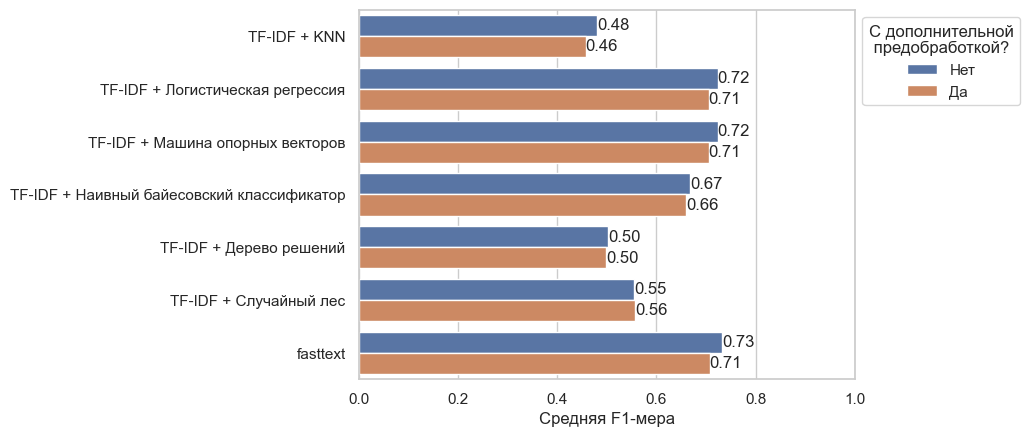

In [5]:
_, ax = plt.subplots()
bar = sns.barplot(metrics, x="f1_avg", y="model", hue="extra_processed")
ax.set_xlim(0, 1)
ax.set_xlabel("Средняя F1-мера")
ax.set_ylabel("")
ax.bar_label(ax.containers[0], fmt='%.2f')
ax.bar_label(ax.containers[1], fmt='%.2f')
ax.get_legend().set_title('С дополнительной\n предобработкой?')
ax.get_legend().texts[0].set_text("Нет")
ax.get_legend().texts[1].set_text("Да")
sns.move_legend(bar, "upper left", bbox_to_anchor=(1, 1))
plt.show()

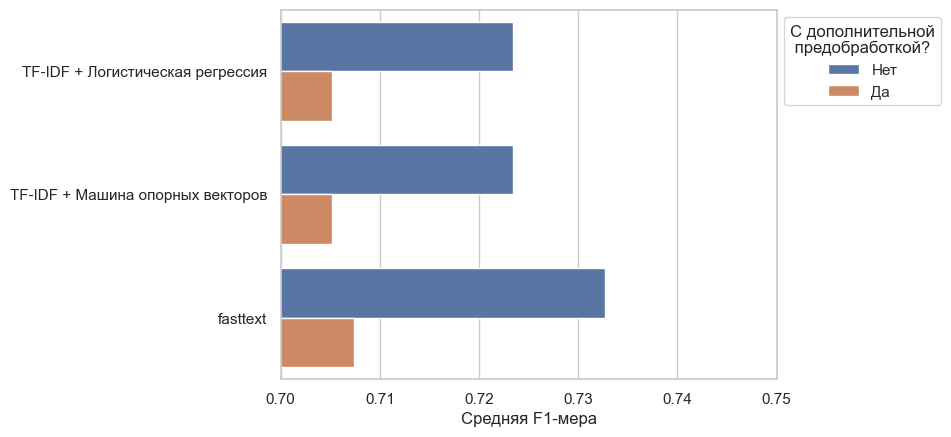

In [6]:
_, ax = plt.subplots()
bar = sns.barplot(metrics[(metrics.model == metrics.model.unique()[1])
                          | (metrics.model == metrics.model.unique()[2])
                          | (metrics.model == metrics.model.unique()[6])],
                  x="f1_avg", y="model", hue="extra_processed")
ax.set_xlim(0.7, 0.75)
ax.set_xlabel("Средняя F1-мера")
ax.set_ylabel("")
ax.get_legend().set_title('С дополнительной\n предобработкой?')
ax.get_legend().texts[0].set_text("Нет")
ax.get_legend().texts[1].set_text("Да")
sns.move_legend(bar, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [7]:
metrics_for_classes = metrics.copy()
metrics_for_classes = metrics_for_classes.melt(id_vars=["model", "extra_processed"],
                                               value_vars=["f1_bug", "f1_enh", "f1_doc", "f1_que"],
                                               var_name="label")
metrics_for_classes.label = metrics_for_classes.label.map({
    "f1_bug" : "bug",
    "f1_enh" : "enhancement",
    "f1_doc" : "documentation",
    "f1_que" : "question"
})

metrics_for_classes

,model,extra_processed,label,value
0,TF-IDF + KNN,False,bug,0.444802
1,TF-IDF + Логистическая регрессия,False,bug,0.733629
2,TF-IDF + Машина опорных векторов,False,bug,0.733629
3,TF-IDF + Наивный байесовский классификатор,False,bug,0.687538
4,TF-IDF + Дерево решений,False,bug,0.581963
5,TF-IDF + Случайный лес,False,bug,0.606736
6,fasttext,False,bug,0.731522
7,TF-IDF + KNN,True,bug,0.450352
8,TF-IDF + Логистическая регрессия,True,bug,0.715294
9,TF-IDF + Машина опорных векторов,True,bug,0.715294


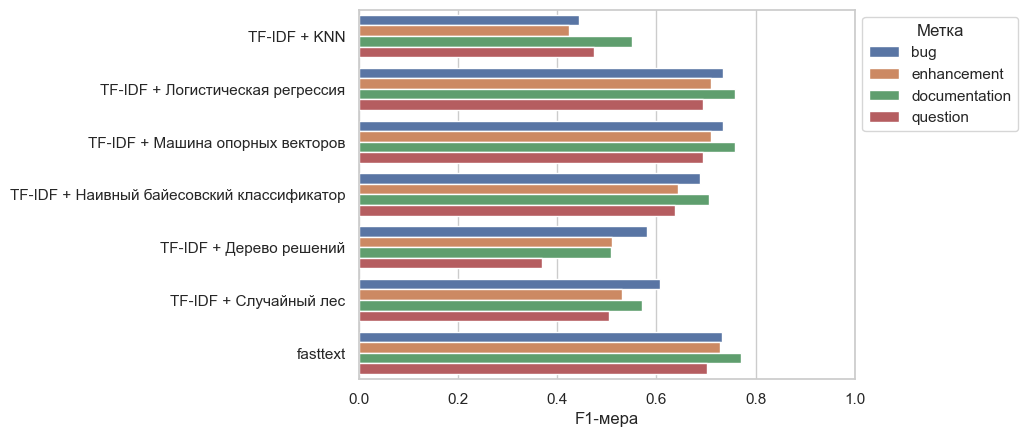

In [8]:
_, ax = plt.subplots()
bar = sns.barplot(metrics_for_classes[metrics_for_classes.extra_processed == False],
            x="value", y="model", hue="label")
ax.set_xlim(0, 1)
ax.set_xlabel("F1-мера")
ax.set_ylabel("")
ax.get_legend().set_title('Метка')
sns.move_legend(bar, "upper left", bbox_to_anchor=(1, 1))
plt.show()

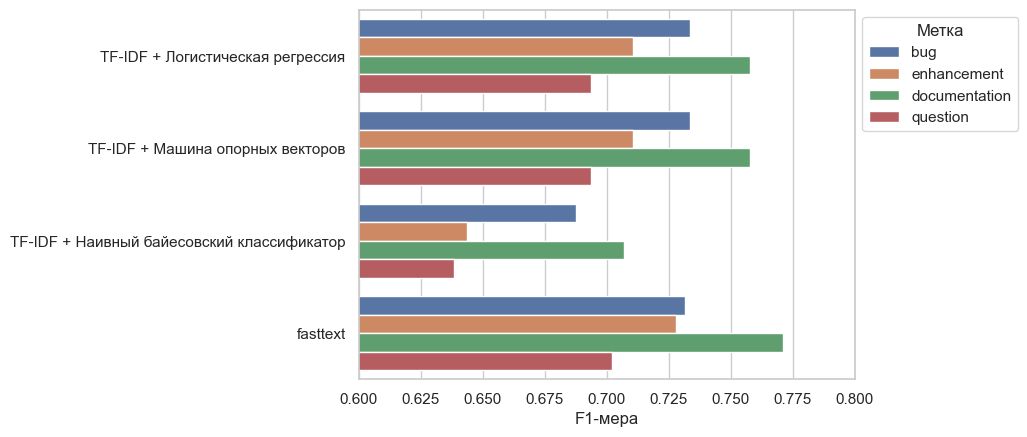

In [10]:
_, ax = plt.subplots()
bar = sns.barplot(metrics_for_classes[((metrics_for_classes.model == metrics_for_classes.model.unique()[1])
                                      | (metrics_for_classes.model == metrics_for_classes.model.unique()[2])
                                      | (metrics_for_classes.model == metrics_for_classes.model.unique()[3])
                                      | (metrics_for_classes.model == metrics_for_classes.model.unique()[6]))
                                      & (metrics_for_classes.extra_processed == False)],
                  x="value", y="model", hue="label")
ax.set_xlim(0.6, 0.8)
ax.set_xlabel("F1-мера")
ax.set_ylabel("")
ax.get_legend().set_title('Метка')
sns.move_legend(bar, "upper left", bbox_to_anchor=(1, 1))
plt.show()